# Axes

The axes are referenced to the tool/carriage:

X - moves towards/away from the tool (perpendicular to the carriage).

Y - moves along the carriage axis

Z - Vertical positioning, rarely used.

A - Yaw of the robot. I believe this rotates around the delivery point of the fibre (the tip of the final roller). The rotation is around the Z axis.

B - Rotation around Y axis (I think), rarely used.

C - Rotation around X axis (I think), rarely used.

E1 - Rotation of the payout eye. 

E2 - Not used, related to the tape placement head I believe.

E3 - This rotates both chucks (headstock and tailstock) together, in a synchronised fashion. 

E4 - This rotates the tailstock ONLY. For example, if you wish to only rotate the headstock, you would require equivalent +ve E3 and -ve E4 motion

In [1]:
from matplotlib import pyplot as plt
%matplotlib widget
import re
fname = "output/Vessel04speedt3.src"
ftext = open(fname, "r").read()


In [2]:
P = { }
def linapply(y, brel):
    for e in y.split(","):
        k, v = e.split()
        P[k] = P.get(k,0)+float(v); continue
    
        if brel and k in "AXYZ":
            P[k] += float(v)
        else:
            P[k] = float(v)
reforblk = "(?s)LIN \{(.*?)\}\nHALT\n.*?FOR N_CYC=1 to (\d+)\n(.*?)ENDFOR"
forblks = re.findall(reforblk, ftext)


In [3]:
Ps = [ ]
for forblk in forblks:
    linapply(forblk[0], False)
    Ps.append(P.copy())
    lins = re.findall("LIN_REL \{(.*?)\}", forblk[2])
    for N_CYC in range(int(forblk[1])):
        for lin in lins:
            linapply(lin, True)
            Ps.append(P.copy())


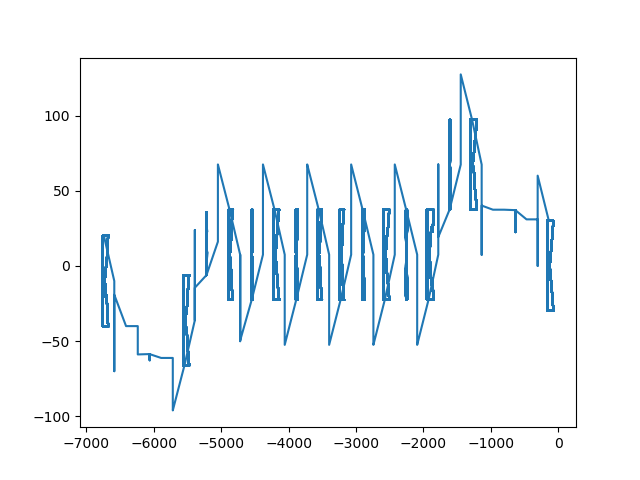

In [12]:
Xs = [ p["X"]  for p in Ps ]
Ys = [ p["Y"]  for p in Ps ]
Zs = [ p["Z"]  for p in Ps ]
As = [ p["A"]  for p in Ps ]
As = [ p["A"]  for p in Ps ]

#plt.plot(Xs, Ys)
plt.figure()
plt.plot(Xs, As)
plt.show()

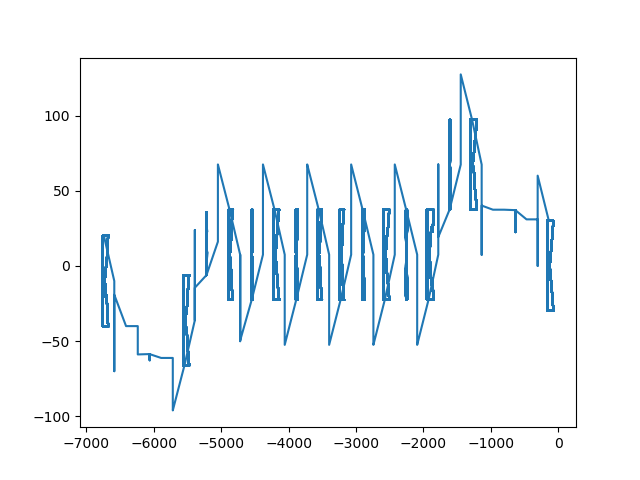

In [13]:
Xs = [ p["X"]  for p in Ps ]
Ys = [ p["Y"]  for p in Ps ]
Zs = [ p["Z"]  for p in Ps ]
As = [ p["A"]  for p in Ps ]

#plt.plot(Xs, Ys)
plt.figure()
plt.plot(Xs, As)
plt.show()

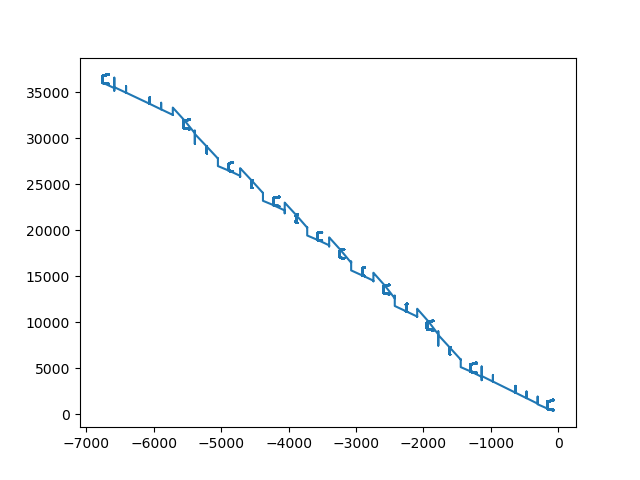

In [14]:
plt.figure()
plt.plot(Xs, Ys)
plt.show()

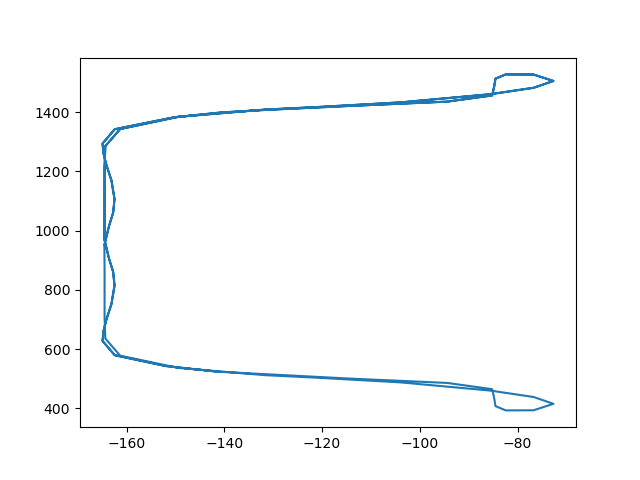

In [15]:
plt.figure()
plt.plot(Xs[:100], Ys[:100])


In [16]:
Ps[0]

{'X': -141.371,
 'Y': 523.534,
 'Z': 0.0,
 'A': 30.0,
 'B': 0.0,
 'C': 0.0,
 'E1': -59.199}

In [17]:
import numpy, math

sPs = Ps[1100:1800]


ke3 = numpy.array([ math.radians(p.get("E3", 0)%360)  for p in sPs ])
kx = numpy.array([ p.get("X", 0)  for p in sPs ])
ky = numpy.array([ p.get("X", 0)  for p in sPs ])

Rx = kx*numpy.cos(ke3)
Rz = kx*numpy.sin(ke3)
Ry = ky


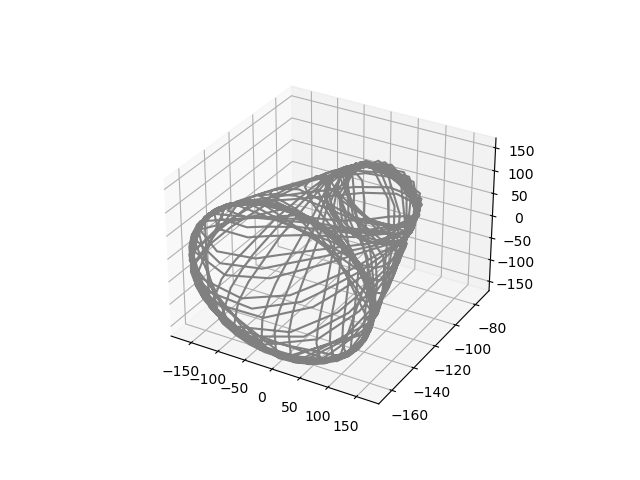

In [19]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot3D(Rx, Ry, Rz, 'gray')
plt.show()



In [20]:
sPs = Ps[1100:1200]
plt.plot([ p.get("E3", 0)%360  for p in sPs ])
plt.plot([ p.get("Y", 0)  for p in sPs ])



TypeError: plot() missing 1 required positional argument: 'ys'

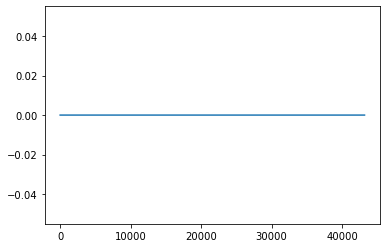

In [67]:
E3=E4
plt.plot([ p.get("E3", 0)-p.get("E4", 0)  for p in Ps ])


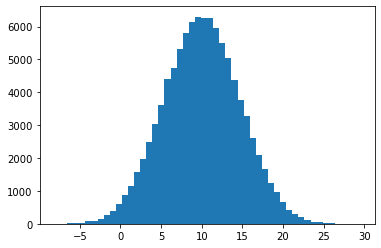

In [24]:
from matplotlib import pyplot as plt
import random
N = 20
S = 100000
def f():
    x = random.uniform(-1, 1)
    return x + (1 if x > 0 else 0)
plt.hist([sum(f() for i in range(N))  for j in range(S)], bins=50);